<a href="https://colab.research.google.com/github/Marvayo/How-to-implement-an-ML-pipeline/blob/master/Tarea_2_Arvayo_Ortegav3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import IPython
from IPython import display
display.Image("./dnn.jpg")

In [31]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [32]:
(train_images, train_labels), (validation_images, validation_labels) = tf.keras.datasets.mnist.load_data()

Train set size 60000 is around 85.7% of the data. Each data point has dimensions (28, 28)
Validation(Dev) set size 10000 is around 14.3% of the data. Each data point has dimensions (28, 28)
There are 10 classes. They are [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


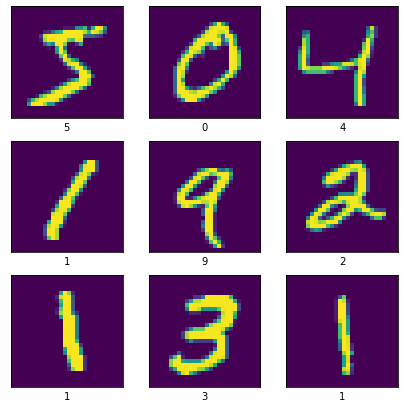

In [33]:
#dataset properties
train_ds_size = len(train_images)
validation_ds_size = len(validation_images)
class_names = list(set(train_labels))
ds_size = train_ds_size + validation_ds_size
print(f'Train set size {train_ds_size} is around {np.around(train_ds_size/ds_size * 100,1)}% of the data. Each data point has dimensions {train_images.shape[1:]}')
print(f'Validation(Dev) set size {validation_ds_size} is around {np.around(validation_ds_size/ds_size * 100,1)}% of the data. Each data point has dimensions {validation_images.shape[1:]}')
print(f'There are {len(class_names)} classes. They are {class_names}')

plt.figure(figsize=(7,7))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [34]:
#Select a ratio of the validation set images to use as test images
ratio = 0.8
#New test set
test_images = validation_images[int(validation_ds_size * ratio):]
test_labels = validation_labels[int(validation_ds_size * ratio):]
#New validation set
validation_images=validation_images[:int(validation_ds_size * ratio)]
validation_labels=validation_labels[:int(validation_ds_size * ratio)]
#dataset properties
train_ds_size = len(train_images)
validation_ds_size = len(validation_images)
test_ds_size = len(test_images)
class_names = list(set(train_labels))
ds_size = train_ds_size + validation_ds_size + test_ds_size

print(f'Train set size {train_ds_size} is around {np.around(train_ds_size/ds_size * 100,1)}% of the data. Each data point has dimensions {train_images.shape[1:]}')
print(f'Validation(Dev) set size {validation_ds_size} is around {np.around(validation_ds_size/ds_size * 100,1)}% of the data. Each data point has dimensions {validation_images.shape[1:]}')
print(f'Test set size {test_ds_size} is around {np.around(test_ds_size/ds_size * 100,1)}% of the data. Each data point has dimensions {test_images.shape[1:]}')
print(f'There are {len(class_names)} classes. They are {class_names}')

Train set size 60000 is around 85.7% of the data. Each data point has dimensions (28, 28)
Validation(Dev) set size 8000 is around 11.4% of the data. Each data point has dimensions (28, 28)
Test set size 2000 is around 2.9% of the data. Each data point has dimensions (28, 28)
There are 10 classes. They are [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [35]:
normalize = True
if normalize == True:
    train_images = train_images / 255.0
    validation_images = validation_images / 255.0
    test_images = test_images / 255.0

In [99]:
def build_model(num_classes=len(class_names), hidden_layers=1, units=128, data_shape=train_images.shape[1:]):
    model = tf.keras.Sequential()
    # input layer
    model.add(tf.keras.layers.InputLayer(input_shape=list(data_shape)))
    # MLP required shape
    model.add(tf.keras.layers.Flatten())
    
    #hidden layer(s)
    #for hidden_layer in range(1,hidden_layers+1):
      #  model.add(tf.keras.layers.Dense(units, activation='relu'))
    
    model.add(tf.keras.layers.Dense(832, activation='relu'))
    #output layer
    model.add(tf.keras.layers.Dense(num_classes, activation='softmax')) 
    #model.add(tf.keras.layers.Dense(num_classes, activation='softmax', kernel_regularizer=tf.keras.regularizers.L2(0.1))) 
    
    loss=tf.keras.losses.SparseCategoricalCrossentropy() 
    metrics=['accuracy']
    optimizer=tf.keras.optimizers.Adam()
    
    model.compile(loss=loss, metrics=metrics, optimizer=optimizer)
    
    return model

In [100]:
model = build_model()
# Verify that the network is as you imagined
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 784)               0         
                                                                 
 dense_24 (Dense)            (None, 832)               653120    
                                                                 
 dense_25 (Dense)            (None, 10)                8330      
                                                                 
Total params: 661,450
Trainable params: 661,450
Non-trainable params: 0
_________________________________________________________________


In [101]:
history = model.fit(train_images, train_labels, epochs=30, batch_size=32, validation_data=(validation_images, validation_labels))


Epoch 1/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1902 - accuracy: 0.9434 - val_loss: 0.0952 - val_accuracy: 0.9720
Epoch 2/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0760 - accuracy: 0.9763 - val_loss: 0.0792 - val_accuracy: 0.9769
Epoch 3/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0492 - accuracy: 0.9841 - val_loss: 0.0925 - val_accuracy: 0.9730
Epoch 4/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0360 - accuracy: 0.9882 - val_loss: 0.0760 - val_accuracy: 0.9775
Epoch 5/30
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0266 - accuracy: 0.9913 - val_loss: 0.0960 - val_accuracy: 0.9750
Epoch 6/30
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0206 - accuracy: 0.9932 - val_loss: 0.0770 - val_accuracy: 0.9808
Epoch 7/30
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0168 - accuracy: 0.9944 - val_loss: 0.0812 - val_ac

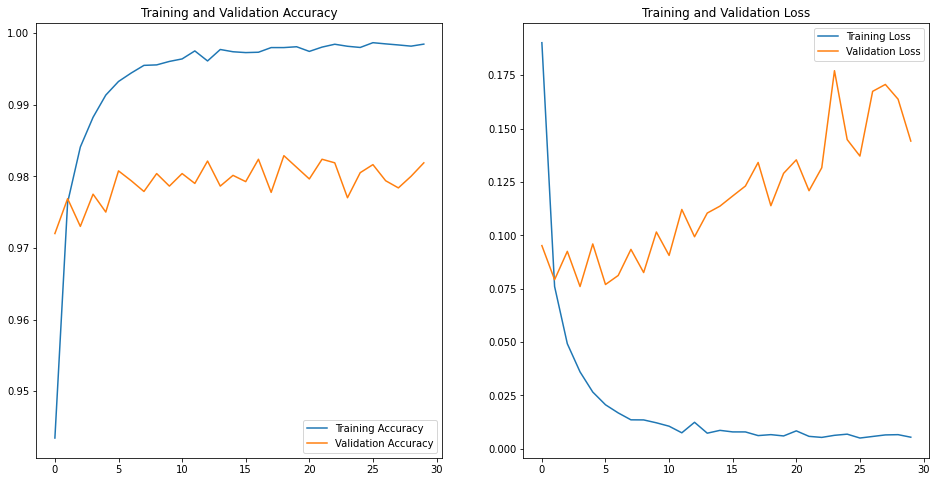

In [102]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [103]:
model.evaluate(test_images, test_labels)


63/63 [==============================] - 0s 4ms/step - loss: 0.0951 - accuracy: 0.9880


[0.09508395195007324, 0.9879999756813049]

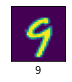

In [98]:
#Choose a random image from the test set
random_image_index = np.random.choice(test_ds_size)
random_image = test_images[random_image_index]
# Use the trained model to predict the label of an image
prediction = model.predict(random_image.reshape(1,28,28))
score = tf.nn.softmax(prediction[0])
predicted_label = list(score).index(max(score))
# See the results
plt.figure(figsize=(1,1))
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(random_image)
plt.xlabel(class_names[predicted_label])
plt.show()